In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv("Groceries_dataset.csv")
dataset.head()

Member_number        Date   itemDescription
0           1808  21-07-2015    tropical fruit
1           2552  05-01-2015        whole milk
2           2300  19-09-2015         pip fruit
3           1187  12-12-2015  other vegetables
4           3037  01-02-2015        whole milk

In [3]:
dataset.info

<bound method DataFrame.info of        Member_number        Date        itemDescription
0               1808  21-07-2015         tropical fruit
1               2552  05-01-2015             whole milk
2               2300  19-09-2015              pip fruit
3               1187  12-12-2015       other vegetables
4               3037  01-02-2015             whole milk
...              ...         ...                    ...
38760           4471  08-10-2014          sliced cheese
38761           2022  23-02-2014                  candy
38762           1097  16-04-2014               cake bar
38763           1510  03-12-2014  fruit/vegetable juice
38764           1521  26-12-2014               cat food

[38765 rows x 3 columns]>

In [4]:
dataset.dtypes

Member_number       int64
Date               object
itemDescription    object
dtype: object

In [5]:
dataset.describe()

Member_number
count   38765.000000
mean     3003.641868
std      1153.611031
min      1000.000000
25%      2002.000000
50%      3005.000000
75%      4007.000000
max      5000.000000

In [6]:
dataset.isnull().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

# Total Product Sold in Week, Month and Year

In [7]:
date = dataset["Date"].str.split(pat='-', expand=True)
dataset["Day"] = date[0]
dataset["Month"] = date[1]
dataset["Year"] = date[2]
dataset.head()

Member_number        Date   itemDescription Day Month  Year
0           1808  21-07-2015    tropical fruit  21    07  2015
1           2552  05-01-2015        whole milk  05    01  2015
2           2300  19-09-2015         pip fruit  19    09  2015
3           1187  12-12-2015  other vegetables  12    12  2015
4           3037  01-02-2015        whole milk  01    02  2015

In [8]:
# Convert month value to string
month_dict ={'01':'Jan', '02': 'Feb', '03': 'Mar', '04': 'Apr', 
             '05': 'May', '06': 'Jun', '07': 'Jul', '08': 'Aug', 
             '09': 'Sep', '10': 'Oct', '11': 'Nov', '12': 'Dec'}

# Apply the month_dict
dataset["Month"] = dataset["Month"].apply(lambda x: month_dict[x])
dataset.head()

Member_number        Date   itemDescription Day Month  Year
0           1808  21-07-2015    tropical fruit  21   Jul  2015
1           2552  05-01-2015        whole milk  05   Jan  2015
2           2300  19-09-2015         pip fruit  19   Sep  2015
3           1187  12-12-2015  other vegetables  12   Dec  2015
4           3037  01-02-2015        whole milk  01   Feb  2015

In [9]:
from datetime import datetime

date_format = '%d-%m-%Y'

# Convert to format time
dataset["Date"] = pd.to_datetime(dataset["Date"], format=date_format)
dataset["DayOfWeek"] = dataset["Date"].dt.strftime("%A")

# Distiguish weekday and weekend
dataset['WeekdayWeekend'] = dataset['DayOfWeek'].map(lambda x: 'weekend' if x in ['Saturday', 'Sunday'] else 'weekday')

# Show the data
dataset.head()

Member_number       Date   itemDescription Day Month  Year DayOfWeek  \
0           1808 2015-07-21    tropical fruit  21   Jul  2015   Tuesday   
1           2552 2015-01-05        whole milk  05   Jan  2015    Monday   
2           2300 2015-09-19         pip fruit  19   Sep  2015  Saturday   
3           1187 2015-12-12  other vegetables  12   Dec  2015  Saturday   
4           3037 2015-02-01        whole milk  01   Feb  2015    Sunday   

  WeekdayWeekend  
0        weekday  
1        weekday  
2        weekend  
3        weekend  
4        weekend

In [10]:
dataset.describe(include="all")

Member_number                           Date itemDescription    Day  \
count    38765.000000                          38765           38765  38765   
unique            NaN                            NaN             167     31   
top               NaN                            NaN      whole milk     03   
freq              NaN                            NaN            2502   1393   
mean      3003.641868  2015-01-09 18:17:12.498387712             NaN    NaN   
min       1000.000000            2014-01-01 00:00:00             NaN    NaN   
25%       2002.000000            2014-07-12 00:00:00             NaN    NaN   
50%       3005.000000            2015-01-21 00:00:00             NaN    NaN   
75%       4007.000000            2015-07-10 00:00:00             NaN    NaN   
max       5000.000000            2015-12-30 00:00:00             NaN    NaN   
std       1153.611031                            NaN             NaN    NaN   

        Month   Year DayOfWeek WeekdayWeekend  
count   38765  38765     38765          38765  
unique     12      2         7              2  
top       Aug   2015  Thursday        weekday  
freq     3496  20488      5620          27684  
mean      NaN    NaN       NaN            NaN  
min       NaN    NaN       NaN            NaN  
25%       NaN    NaN       NaN            NaN  
50%       NaN    NaN       NaN            NaN  
75%       NaN    NaN       NaN            NaN  
max       NaN    NaN       NaN            NaN  
std       NaN    NaN       NaN            NaN

In [11]:
item_count = dataset["itemDescription"].value_counts()
item_count

itemDescription
whole milk               2502
other vegetables         1898
rolls/buns               1716
soda                     1514
yogurt                   1334
                         ... 
rubbing alcohol             5
bags                        4
baby cosmetics              3
kitchen utensil             1
preservation products       1
Name: count, Length: 167, dtype: int64

In [12]:
# Visualize the top item purchases
fig = px.bar(data_frame=item_count.head(30),
             title="Top 30 Items",
             text_auto=".3s",
             labels = {"index": "Items",
                       "values": "Quantities",
                       "lift": "Lift"})
fig.update_layout(title_x=0.5,
                  title_y=0.9)
fig.show()

In [13]:
# Calculate the frequencies item
freq_of_item = dataset.groupby(pd.Grouper(key="itemDescription")).size().reset_index(name="count")

# Visualize the frequencies
fig = px.treemap(freq_of_item, path=["itemDescription"], values="count")

# Set the layout
fig.update_layout(title_text="Frequencies Item Purchases",
                  title_x=0.5,
                  title_font=dict(size=16),
                  height=999)
fig.update_traces(textinfo="label + value")

# Show the plot
fig.show()

In [14]:
# Calculate the total product sales
# Per Week
DataWeek = dataset.groupby(["DayOfWeek", "Year"])["itemDescription"].count().reset_index()
DataWeek.sort_values(by="itemDescription", ascending=False)

DayOfWeek  Year  itemDescription
13  Wednesday  2015             3021
1      Friday  2015             3002
7      Sunday  2015             2994
11    Tuesday  2015             2914
5    Saturday  2015             2886
9    Thursday  2015             2882
3      Monday  2015             2789
8    Thursday  2014             2738
4    Saturday  2014             2665
10    Tuesday  2014             2644
2      Monday  2014             2593
0      Friday  2014             2560
12  Wednesday  2014             2541
6      Sunday  2014             2536

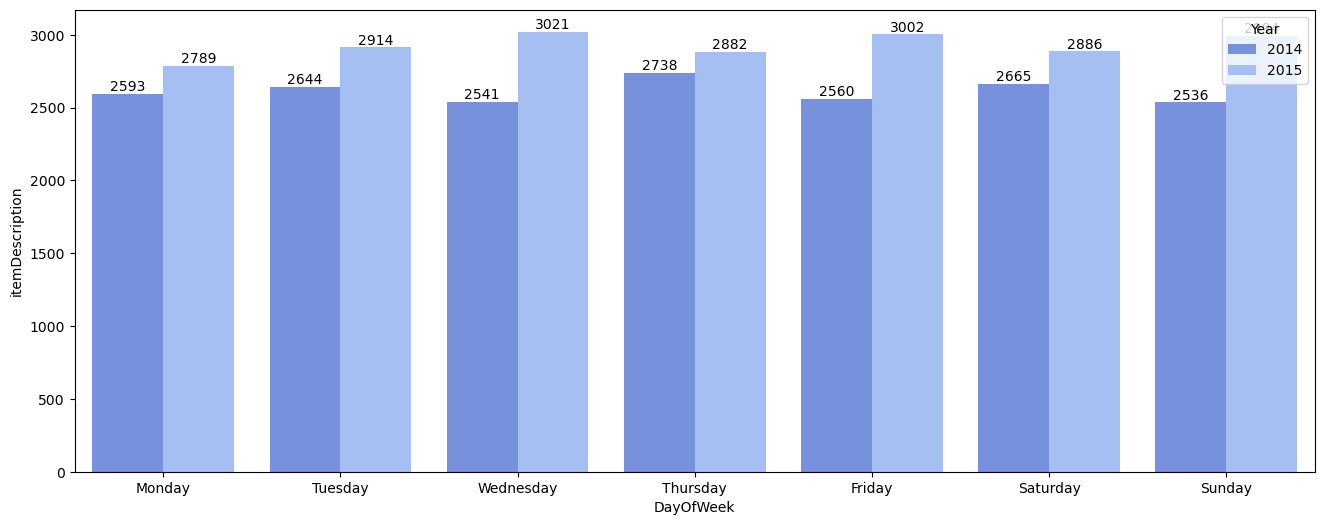

In [15]:
# Visualize
fig = plt.figure(figsize=(16, 6))
from pandas.api.types import CategoricalDtype
week_ordered = CategoricalDtype(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

# Adjust the data
DataWeek["DayOfWeek"] = DataWeek["DayOfWeek"].astype(week_ordered)
DataWeek = DataWeek.sort_values(by="DayOfWeek")

# Adjust the plot
colors = sns.color_palette("coolwarm")
ax = sns.barplot(data = DataWeek, 
                 x = "DayOfWeek",
                 y = "itemDescription",
                 hue = "Year",
                 palette = colors)

# Show the plot
for i in ax.containers:
    ax.bar_label(i)
plt.show()

In [16]:
# Per Month
DataMonth = dataset.groupby(["Month", "Year"])["itemDescription"].count().reset_index()

DataMonth.sort_values(by="itemDescription", ascending=False)

Month  Year  itemDescription
3    Aug  2015             1921
9    Jan  2015             1797
17   May  2015             1793
19   Nov  2015             1785
11   Jul  2015             1724
15   Mar  2015             1722
1    Apr  2015             1699
13   Jun  2015             1694
21   Oct  2015             1670
16   May  2014             1615
20   Oct  2014             1591
23   Sep  2015             1587
10   Jul  2014             1576
2    Aug  2014             1575
12   Jun  2014             1570
0    Apr  2014             1561
7    Feb  2015             1560
5    Dec  2015             1536
8    Jan  2014             1527
4    Dec  2014             1473
22   Sep  2014             1472
18   Nov  2014             1469
6    Feb  2014             1437
14   Mar  2014             1411

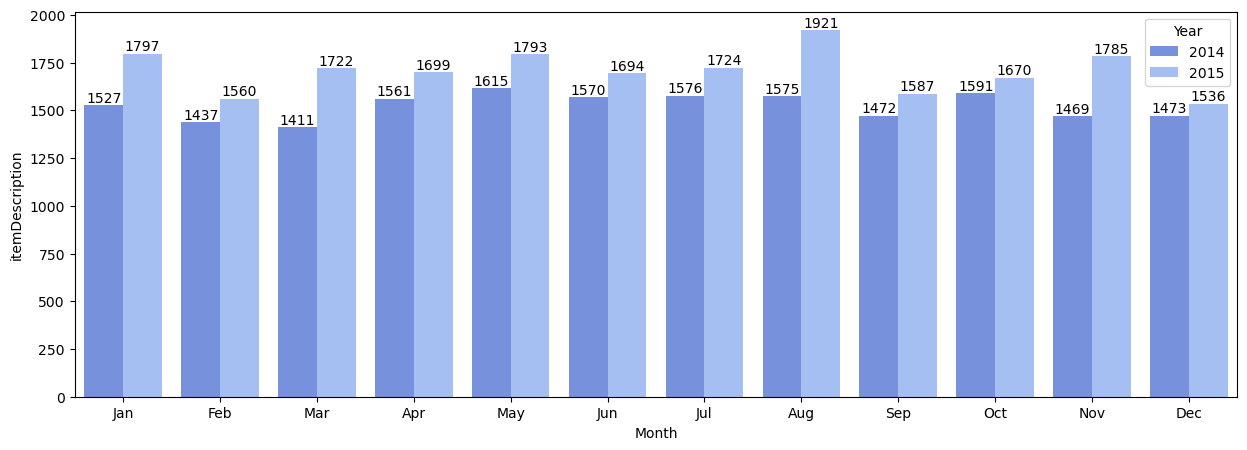

In [17]:
# Total product sales by Months
plt.figure(figsize = (15, 5))
months_ordered = CategoricalDtype(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

# Adjust the data
DataMonth['Month'] = DataMonth['Month'].astype(months_ordered)
DataMonth = DataMonth.sort_values(by = 'Month')

# Adjust the plot
ax = sns.barplot(data = DataMonth,
                 x = 'Month', 
                 y = 'itemDescription', 
                 hue = 'Year', 
                 palette = colors)

# Show the plot
for i in ax.containers:
     ax.bar_label(i)
plt.show()  

In [18]:
# Per Year
DataYear = dataset.groupby("Year")["itemDescription"].count().reset_index()

DataYear

Year  itemDescription
0  2014            18277
1  2015            20488

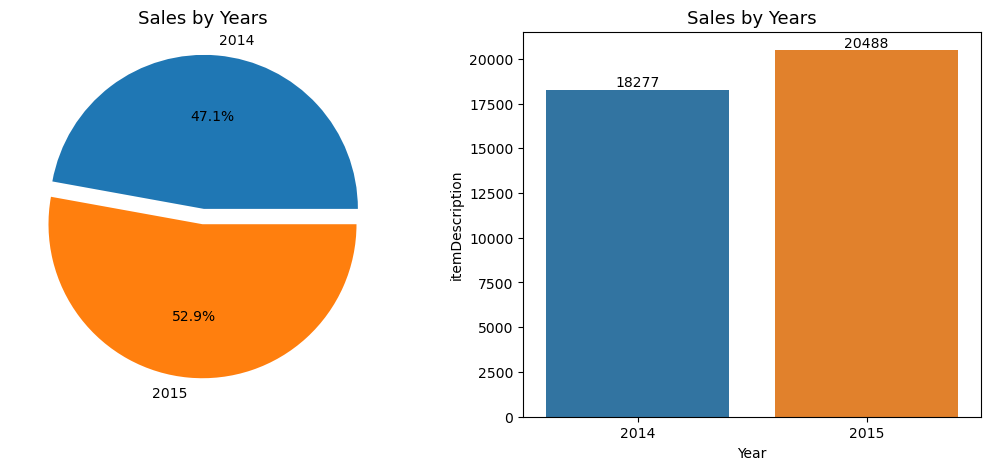

In [19]:
datayearsy = DataYear['Year'].tolist()
dataitem = DataYear['itemDescription'].tolist()

# Pier chart
plt.figure(figsize = (13, 5))
plt.subplot(1, 2, 1)
explode = (0.1, 0)
colors = sns.color_palette('Paired')
plt.pie(dataitem,
        labels = datayearsy, 
        autopct = '%1.1f%%', 
        explode = explode)
plt.title('Sales by Years', size = 13)


# Bar chart
plt.subplot(1, 2, 2)
ax=sns.barplot(data = DataYear,
               x = 'Year', 
               y = 'itemDescription')
for i in ax.containers:
    ax.bar_label(i)
plt.title('Sales by Years', size = 13)    
plt.show()


# TimeSeries Analysis

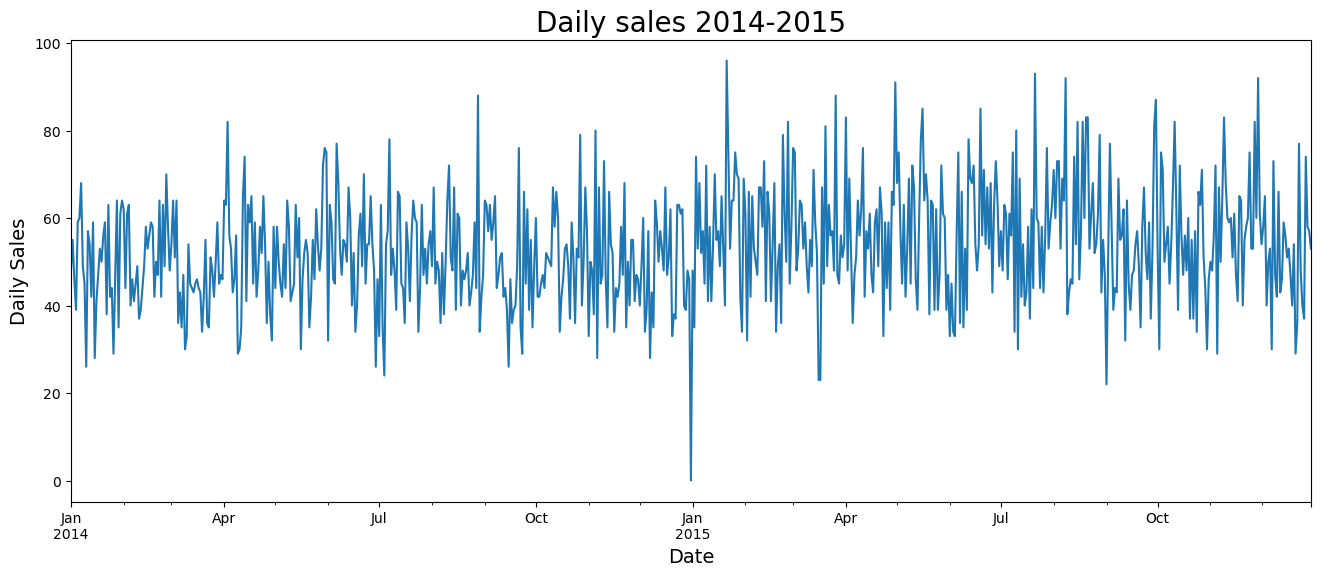

In [20]:
# Make a copy and set Date as index
df = dataset.copy()
df.set_index("Date", inplace=True)

# Visualize using line graph
df.resample("D")[["itemDescription"]].count().plot(kind="line", figsize=(16, 6), legend=None)
plt.title("Daily sales 2014-2015", fontsize=20)
plt.ylabel("Daily Sales", fontsize=14)
plt.xlabel("Date", fontsize=14)
plt.show()

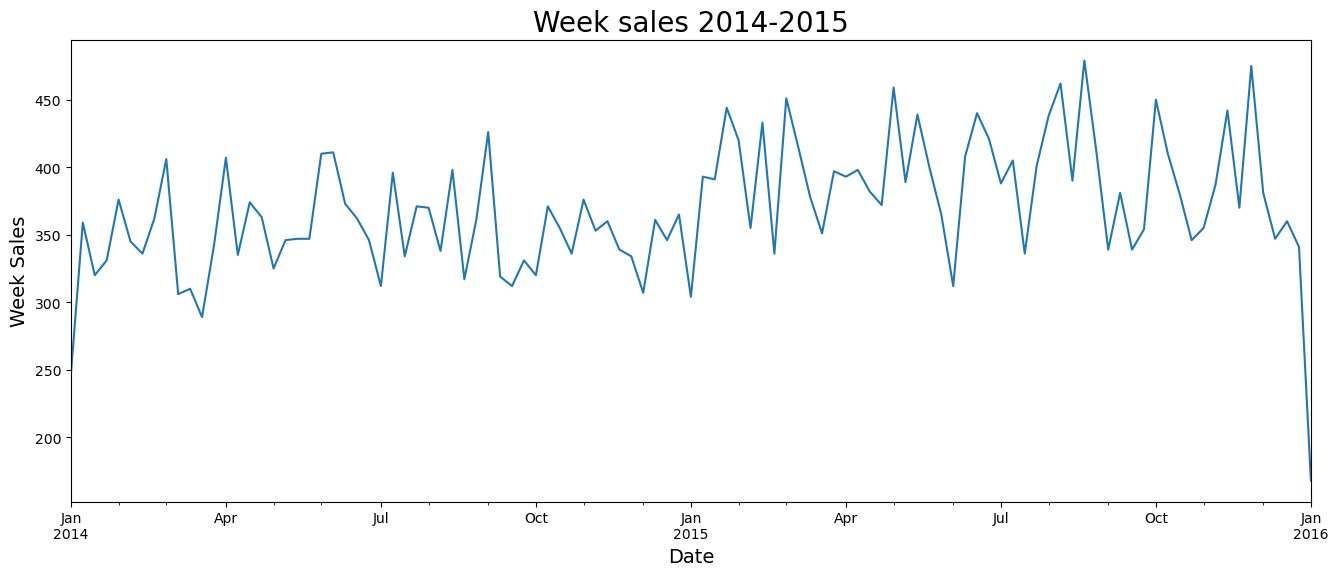

In [21]:
# Make a copy and set Date as index
df = dataset.copy()
df.set_index("Date", inplace=True)

# Visualize using line graph
df.resample("W")[["itemDescription"]].count().plot(kind="line", figsize=(16, 6), legend=None)
plt.title("Week sales 2014-2015", fontsize=20)
plt.ylabel("Week Sales", fontsize=14)
plt.xlabel("Date", fontsize=14)
plt.show()

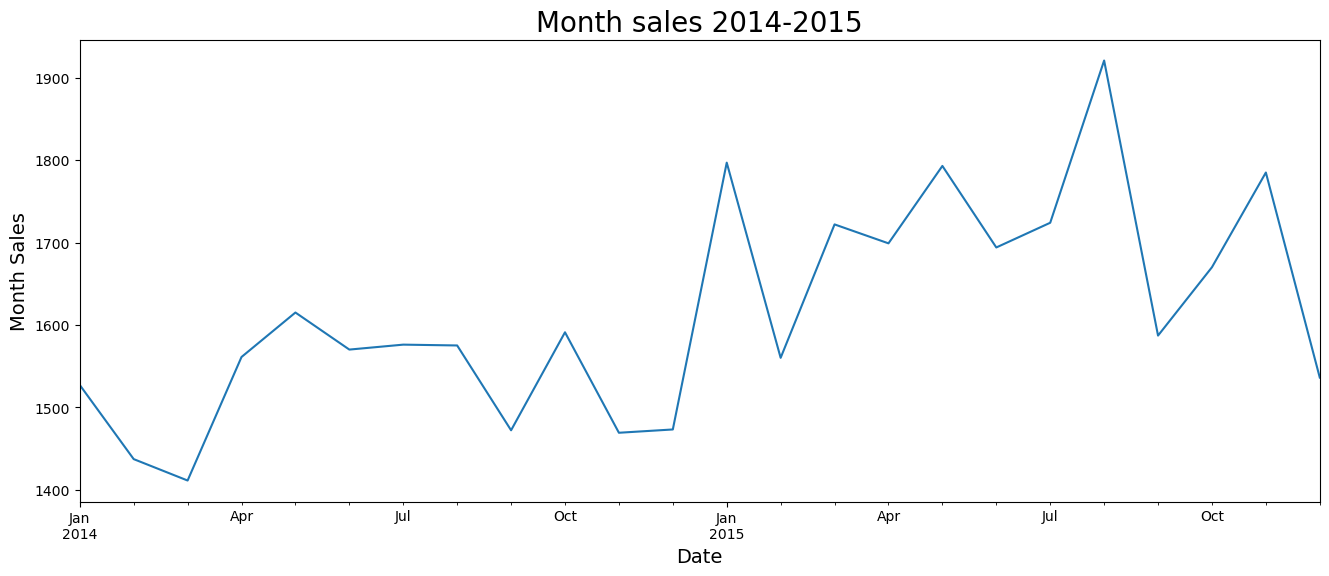

In [22]:
# Make a copy and set Date as index
df = dataset.copy()
df.set_index("Date", inplace=True)

# Visualize using line graph
df.resample("M")[["itemDescription"]].count().plot(kind="line", figsize=(16, 6), legend=None)
plt.title("Month sales 2014-2015", fontsize=20)
plt.ylabel("Month Sales", fontsize=14)
plt.xlabel("Date", fontsize=14)
plt.show()

In [23]:
# Split the data into 2014 and 2015 for easily understanding
TotalWeek = df.groupby(["Year", "DayOfWeek"], as_index=False).agg(Sales=("itemDescription", "count"))
TotalWeek

Year  DayOfWeek  Sales
0   2014     Friday   2560
1   2014     Monday   2593
2   2014   Saturday   2665
3   2014     Sunday   2536
4   2014   Thursday   2738
5   2014    Tuesday   2644
6   2014  Wednesday   2541
7   2015     Friday   3002
8   2015     Monday   2789
9   2015   Saturday   2886
10  2015     Sunday   2994
11  2015   Thursday   2882
12  2015    Tuesday   2914
13  2015  Wednesday   3021

In [24]:
# Adjust the data
order_days = CategoricalDtype(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
TotalWeek["DayOfWeek"] = TotalWeek["DayOfWeek"].astype(order_days)
TotalWeek = TotalWeek.sort_values(by="DayOfWeek")

# Adjust the plot
fig = px.line(TotalWeek,
              x="DayOfWeek",
              y="Sales",
              color="Year")

# Set the title
fig.update_layout(title_text="Weekdays Sales 2014 - 2015",
                  title_x=0.5,
                  title={"font": {"size":20}}) 

In [25]:
# Split the data into 2014 and 2015 for easily understanding
TotalMonth = df.groupby(["Year", "Month"], as_index=False).agg(Sales=("itemDescription", "count"))
TotalMonth.head()

Year Month  Sales
0  2014   Apr   1561
1  2014   Aug   1575
2  2014   Dec   1473
3  2014   Feb   1437
4  2014   Jan   1527

In [26]:
# Adjust the data
months_ordered = CategoricalDtype(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
TotalMonth["Month"] = TotalMonth["Month"].astype(months_ordered)
TotalWeek = TotalMonth.sort_values(by="Month")

# Adjust the plot
fig = px.line(TotalMonth,
              x="Month",
              y="Sales",
              color="Year")

# Set the title
fig.update_layout(title_text="Month Sales 2014 - 2015",
                  title_x=0.5,
                  title={"font": {"size":20}}) 

In [27]:
TotalDaily = df.groupby(["Year", "Day"], as_index=False).agg(Sales=("itemDescription", "count"))
TotalDaily.head()

Year Day  Sales
0  2014  01    583
1  2014  02    681
2  2014  03    636
3  2014  04    567
4  2014  05    598

In [28]:
# Adjust the plot
fig = px.line(TotalDaily,
              x="Day",
              y="Sales",
              color="Year")

# Set the title
fig.update_layout(title_text="Daily Sales 2014 - 2015",
                  title_x=0.5,
                  title={"font": {"size":20}}) 

# Market Basket Analysis

In [29]:
df.head()

Member_number   itemDescription Day Month  Year DayOfWeek  \
Date                                                                    
2015-07-21           1808    tropical fruit  21   Jul  2015   Tuesday   
2015-01-05           2552        whole milk  05   Jan  2015    Monday   
2015-09-19           2300         pip fruit  19   Sep  2015  Saturday   
2015-12-12           1187  other vegetables  12   Dec  2015  Saturday   
2015-02-01           3037        whole milk  01   Feb  2015    Sunday   

           WeekdayWeekend  
Date                       
2015-07-21        weekday  
2015-01-05        weekday  
2015-09-19        weekend  
2015-12-12        weekend  
2015-02-01        weekend

In [30]:
df["Member_number"] = df["Member_number"].astype(str)
df["itemDescription"] = df["itemDescription"].str.strip()
df.head()

Member_number   itemDescription Day Month  Year DayOfWeek  \
Date                                                                   
2015-07-21          1808    tropical fruit  21   Jul  2015   Tuesday   
2015-01-05          2552        whole milk  05   Jan  2015    Monday   
2015-09-19          2300         pip fruit  19   Sep  2015  Saturday   
2015-12-12          1187  other vegetables  12   Dec  2015  Saturday   
2015-02-01          3037        whole milk  01   Feb  2015    Sunday   

           WeekdayWeekend  
Date                       
2015-07-21        weekday  
2015-01-05        weekday  
2015-09-19        weekend  
2015-12-12        weekend  
2015-02-01        weekend

In [31]:
df.shape

(38765, 7)

In [32]:
# Create a matrix
basket_matrix = (df.groupby(["Member_number", "itemDescription"])["itemDescription"].count().unstack().fillna(0).reset_index())
basket_matrix = basket_matrix.drop("Member_number", axis=1)
basket_matrix.head()

itemDescription  Instant food products  UHT-milk  abrasive cleaner  \
0                                  0.0       0.0               0.0   
1                                  0.0       0.0               0.0   
2                                  0.0       0.0               0.0   
3                                  0.0       0.0               0.0   
4                                  0.0       0.0               0.0   

itemDescription  artif. sweetener  baby cosmetics  bags  baking powder  \
0                             0.0             0.0   0.0            0.0   
1                             0.0             0.0   0.0            0.0   
2                             0.0             0.0   0.0            0.0   
3                             0.0             0.0   0.0            0.0   
4                             0.0             0.0   0.0            0.0   

itemDescription  bathroom cleaner  beef  berries  ...  turkey  vinegar  \
0                             0.0   0.0      0.0  ...     0.0      0.0   
1                             0.0   1.0      0.0  ...     0.0      0.0   
2                             0.0   0.0      0.0  ...     0.0      0.0   
3                             0.0   0.0      0.0  ...     0.0      0.0   
4                             0.0   0.0      0.0  ...     0.0      0.0   

itemDescription  waffles  whipped/sour cream  whisky  white bread  white wine  \
0                    0.0                 0.0     0.0          0.0         0.0   
1                    0.0                 1.0     0.0          1.0         0.0   
2                    0.0                 0.0     0.0          0.0         0.0   
3                    0.0                 0.0     0.0          0.0         0.0   
4                    0.0                 0.0     0.0          0.0         0.0   

itemDescription  whole milk  yogurt  zwieback  
0                       2.0     1.0       0.0  
1                       2.0     0.0       0.0  
2                       1.0     0.0       0.0  
3                       0.0     0.0       0.0  
4                       3.0     0.0       0.0  

[5 rows x 167 columns]

In [33]:
basket_matrix.shape

(3898, 167)

In [34]:
basket_sets = basket_matrix.applymap(lambda x: 1 if x >= 1 else 0)
basket_sets

itemDescription  Instant food products  UHT-milk  abrasive cleaner  \
0                                    0         0                 0   
1                                    0         0                 0   
2                                    0         0                 0   
3                                    0         0                 0   
4                                    0         0                 0   
...                                ...       ...               ...   
3893                                 0         0                 0   
3894                                 0         0                 0   
3895                                 0         0                 0   
3896                                 0         0                 0   
3897                                 0         0                 0   

itemDescription  artif. sweetener  baby cosmetics  bags  baking powder  \
0                               0               0     0              0   
1                               0               0     0              0   
2                               0               0     0              0   
3                               0               0     0              0   
4                               0               0     0              0   
...                           ...             ...   ...            ...   
3893                            0               0     0              0   
3894                            0               0     0              0   
3895                            0               0     0              0   
3896                            0               0     0              0   
3897                            0               0     0              0   

itemDescription  bathroom cleaner  beef  berries  ...  turkey  vinegar  \
0                               0     0        0  ...       0        0   
1                               0     1        0  ...       0        0   
2                               0     0        0  ...       0        0   
3                               0     0        0  ...       0        0   
4                               0     0        0  ...       0        0   
...                           ...   ...      ...  ...     ...      ...   
3893                            0     0        0  ...       0        0   
3894                            0     0        0  ...       0        0   
3895                            0     0        0  ...       0        0   
3896                            0     0        1  ...       0        0   
3897                            0     0        0  ...       0        0   

itemDescription  waffles  whipped/sour cream  whisky  white bread  white wine  \
0                      0                   0       0            0           0   
1                      0                   1       0            1           0   
2                      0                   0       0            0           0   
3                      0                   0       0            0           0   
4                      0                   0       0            0           0   
...                  ...                 ...     ...          ...         ...   
3893                   0                   0       0            0           0   
3894                   0                   0       0            0           1   
3895                   0                   0       0            0           0   
3896                   0                   1       0            0           0   
3897                   0                   0       0            0           0   

itemDescription  whole milk  yogurt  zwieback  
0                         1       1         0  
1                         1       0         0  
2                         1       0         0  
3                         0       0         0  
4                         1       0         0  
...                     ...     ...       ...  
3893                      0       0         0  
3894                    

In [35]:
unique_customers = len(df['Member_number'].unique())
unique_itens = len(df['itemDescription'].unique())
print('There are', unique_customers, 'unique customers')
print('There are', unique_itens, 'unique grocery item')


There are 3898 unique customers
There are 167 unique grocery item


In [36]:
transactions = [a[1]['itemDescription'].tolist() for a in list(df.groupby(['Member_number','Date']))]
all_transactions = len(transactions)
print(f'There are {all_transactions} unique transactions')

There are 14963 unique transactions


In [37]:
from mlxtend.frequent_patterns import apriori, association_rules
import time

# Supress the warning
import warnings
warnings.filterwarnings("ignore")

In [38]:
# Start the timer
StartTime = time.time()

# Calculate the support
frequent_item = apriori(basket_sets, min_support=0.01, use_colnames=True)

# End the timer
EndTime= time.time()

# Calculate time apriori execution took
TotalTime = EndTime - StartTime
print(f"The Apriori Execution Took: {TotalTime} seconds")

The Apriori Execution Took: 6.4045209884643555 seconds


In [39]:
frequent_item.sort_values(by="support", ascending=False)

support                                   itemsets
113   0.458184                               (whole milk)
69    0.376603                         (other vegetables)
84    0.349666                               (rolls/buns)
94    0.313494                                     (soda)
114   0.282966                                   (yogurt)
...        ...                                        ...
2269  0.010005           (whole milk, sausage, ice cream)
2266  0.010005  (rolls/buns, other vegetables, ice cream)
2263  0.010005      (other vegetables, whole milk, herbs)
956   0.010005                    (misc. beverages, pork)
2293  0.010005    (rolls/buns, tropical fruit, margarine)

[3016 rows x 2 columns]

In [40]:
market_rules = association_rules(frequent_item, metric="lift", min_threshold=1)
market_rules.sort_values(by="lift", ascending=False)

antecedents  \
15179  (other vegetables, whole milk, sausage)   
15190                     (rolls/buns, yogurt)   
15181   (rolls/buns, other vegetables, yogurt)   
15188                    (whole milk, sausage)   
12801                    (whole milk, sausage)   
...                                        ...   
7645                                    (soda)   
985                             (cream cheese)   
984                                (pip fruit)   
476                       (whipped/sour cream)   
477                              (brown bread)   

                                   consequents  antecedent support  \
15179                     (rolls/buns, yogurt)            0.050282   
15190  (other vegetables, whole milk, sausage)            0.111339   
15181                    (whole milk, sausage)            0.052335   
15188   (rolls/buns, other vegetables, yogurt)            0.106978   
12801                           (yogurt, curd)            0.106978   
...                                        ...                 ...   
7645     (other vegetables, frozen vegetables)            0.313494   
985                                (pip fruit)            0.088507   
984                             (cream cheese)            0.170600   
476                              (brown bread)            0.154695   
477                       (whipped/sour cream)            0.135967   

       consequent support   support  confidence      lift  leverage  \
15179            0.111339  0.013597    0.270408  2.428689  0.007998   
15190            0.050282  0.013597    0.122120  2.428689  0.007998   
15181            0.106978  0.013597    0.259804  2.428575  0.007998   
15188            0.052335  0.013597    0.127098  2.428575  0.007998   
12801            0.040277  0.010005    0.093525  2.322046  0.005696   
...                   ...       ...         ...       ...       ...   
7645             0.045664  0.014366    0.045827  1.003549  0.000051   
985              0.170600  0.015136    0.171014  1.002428  0.000037   
984              0.088507  0.015136    0.088722  1.002428  0.000037   
476              0.135967  0.021036    0.135987  1.000144  0.000003   
477              0.154695  0.021036    0.154717  1.000144  0.000003   

       conviction  zhangs_metric  
15179    1.218025       0.619400  
15190    1.081831       0.661957  
15181    1.206467       0.620721  
15188    1.085650       0.658702  
12801    1.058742       0.637549  
...           ...            ...  
7645     1.000170       0.005152  
985      1.000500       0.002657  
984      1.000236       0.002920  
476      1.000023       0.000170  
477      1.000026       0.000167  

[15260 rows x 10 columns]

In [41]:
pd.DataFrame.iteritems = pd.DataFrame.items
market_rules_sorted = market_rules[(market_rules["lift"]>=2)]
market_rules_sorted.sort_values(by="lift", ascending=False)

antecedents  \
15179        (other vegetables, whole milk, sausage)   
15190                           (rolls/buns, yogurt)   
15181         (rolls/buns, other vegetables, yogurt)   
15188                          (whole milk, sausage)   
12796                                 (yogurt, curd)   
...                                              ...   
15205  (rolls/buns, other vegetables, shopping bags)   
13049                       (rolls/buns, whole milk)   
13052               (other vegetables, frozen meals)   
15207        (rolls/buns, shopping bags, whole milk)   
15222                     (yogurt, other vegetables)   

                                   consequents  antecedent support  \
15179                     (rolls/buns, yogurt)            0.050282   
15190  (other vegetables, whole milk, sausage)            0.111339   
15181                    (whole milk, sausage)            0.052335   
15188   (rolls/buns, other vegetables, yogurt)            0.106978   
12796                    (whole milk, sausage)            0.040277   
...                                        ...                 ...   
15205                     (yogurt, whole milk)            0.032837   
13049         (other vegetables, frozen meals)            0.178553   
13052                 (rolls/buns, whole milk)            0.027707   
15207               (yogurt, other vegetables)            0.041303   
15222  (rolls/buns, shopping bags, whole milk)            0.120318   

       consequent support   support  confidence      lift  leverage  \
15179            0.111339  0.013597    0.270408  2.428689  0.007998   
15190            0.050282  0.013597    0.122120  2.428689  0.007998   
15181            0.106978  0.013597    0.259804  2.428575  0.007998   
15188            0.052335  0.013597    0.127098  2.428575  0.007998   
12796            0.106978  0.010005    0.248408  2.322046  0.005696   
...                   ...       ...         ...       ...       ...   
15205            0.150590  0.010005    0.304688  2.023291  0.005060   
13049            0.027707  0.010005    0.056034  2.022430  0.005058   
13052            0.178553  0.010005    0.361111  2.022430  0.005058   
15207            0.120318  0.010005    0.242236  2.013296  0.005036   
15222            0.041303  0.010005    0.083156  2.013296  0.005036   

       conviction  zhangs_metric  
15179    1.218025       0.619400  
15190    1.081831       0.661957  
15181    1.206467       0.620721  
15188    1.085650       0.658702  
12796    1.188173       0.593239  
...           ...            ...  
15205    1.221623       0.522927  
13049    1.030010       0.615433  
13052    1.285743       0.519951  
15207    1.160892       0.524986  
15222    1.045648       0.572141  

[74 rows x 10 columns]

In [42]:
# Sort the value by lift >= 2 and confidence >= 0.35
market_rules_sorted = market_rules[(market_rules["lift"]>=2) & (market_rules["confidence"]>=0.35) ]
market_rules_sorted.sort_values(by="lift", ascending=False).reset_index(drop=True)

antecedents                     consequents  \
0  (rolls/buns, bottled water, yogurt)  (other vegetables, whole milk)   
1  (rolls/buns, shopping bags, yogurt)  (other vegetables, whole milk)   
2  (yogurt, other vegetables, sausage)        (rolls/buns, whole milk)   
3     (other vegetables, frozen meals)        (rolls/buns, whole milk)   

   antecedent support  consequent support   support  confidence      lift  \
0            0.026424            0.191380  0.010518    0.398058  2.079934   
1            0.025141            0.191380  0.010005    0.397959  2.079417   
2            0.037199            0.178553  0.013597    0.365517  2.047107   
3            0.027707            0.178553  0.010005    0.361111  2.022430   

   leverage  conviction  zhangs_metric  
0  0.005461    1.343352       0.533308  
1  0.005194    1.343131       0.532483  
2  0.006955    1.294672       0.531268  
3  0.005058    1.285743       0.519951

In [43]:
# Print the highest lift product
print(f"Total sales for Rolls/Buns: {basket_sets['rolls/buns'].sum()} pieces")
print(f"Total sales for Other Vegetables: {basket_sets['other vegetables'].sum()} pieces")
print(f"Total sales for Bottled Water: {basket_sets['bottled water'].sum()} pieces")
print(f"Total sales for Whole Milk: {basket_sets['whole milk'].sum()} pieces")
print(f"Total sales for Yogour: {basket_sets['yogurt'].sum()} pieces")

Total sales for Rolls/Buns: 1363 pieces
Total sales for Other Vegetables: 1468 pieces
Total sales for Bottled Water: 833 pieces
Total sales for Whole Milk: 1786 pieces
Total sales for Yogour: 1103 pieces


In [44]:
# Sort the value by lift >= 1 and confidence >= 0.70
market_rules_sorted2 = market_rules[(market_rules["lift"]>=1) & (market_rules["confidence"]>=0.70) ]
market_rules_sorted2.sort_values(by="lift", ascending=False).reset_index(drop=True)

antecedents   consequents  \
0                               (domestic eggs, meat)  (whole milk)   
1                  (fruit/vegetable juice, chocolate)  (whole milk)   
2   (rolls/buns, other vegetables, yogurt, bottled...  (whole milk)   
3                  (yogurt, bottled water, pip fruit)  (whole milk)   
4                   (rolls/buns, brown bread, yogurt)  (whole milk)   
5      (bottled water, other vegetables, brown bread)  (whole milk)   
6                  (rolls/buns, yogurt, bottled beer)  (whole milk)   
7                                (yogurt, curd, soda)  (whole milk)   
8   (rolls/buns, other vegetables, shopping bags, ...  (whole milk)   
9                (domestic eggs, rolls/buns, sausage)  (whole milk)   
10                        (yogurt, pastry, pip fruit)  (whole milk)   
11                        (hamburger meat, pip fruit)  (whole milk)   
12                 (yogurt, other vegetables, butter)  (whole milk)   
13                             (butter, cream cheese)  (whole milk)   

    antecedent support  consequent support   support  confidence      lift  \
0             0.013084            0.458184  0.010262    0.784314  1.711789   
1             0.014366            0.458184  0.010775    0.750000  1.636898   
2             0.014110            0.458184  0.010518    0.745455  1.626978   
3             0.013853            0.458184  0.010262    0.740741  1.616689   
4             0.017445            0.458184  0.012827    0.735294  1.604802   
5             0.016675            0.458184  0.012057    0.723077  1.578138   
6             0.019241            0.458184  0.013853    0.720000  1.571422   
7             0.015136            0.458184  0.010775    0.711864  1.553666   
8             0.014110            0.458184  0.010005    0.709091  1.547613   
9             0.014879            0.458184  0.010518    0.706897  1.542823   
10            0.014879            0.458184  0.010518    0.706897  1.542823   
11            0.016419            0.458184  0.011544    0.703125  1.534592   
12            0.022319            0.458184  0.015649    0.701149  1.530280   
13            0.015393            0.458184  0.010775    0.700000  1.527772   

    leverage  conviction  zhangs_metric  
0   0.004267    2.512057       0.421328  
1   0.004192    2.167265       0.394760  
2   0.004053    2.128564       0.390879  
3   0.003914    2.089863       0.386811  
4   0.004834    2.046862       0.383561  
5   0.004417    1.956559       0.372554  
6   0.005038    1.935058       0.370768  
7   0.003840    1.880421       0.361838  
8   0.003540    1.862494       0.358908  
9   0.003701    1.848550       0.357152  
10  0.003701    1.848550       0.357152  
11  0.004022    1.825065       0.354176  
12  0.005423    1.813001       0.354436  
13  0.003722    1.806054       0.350852

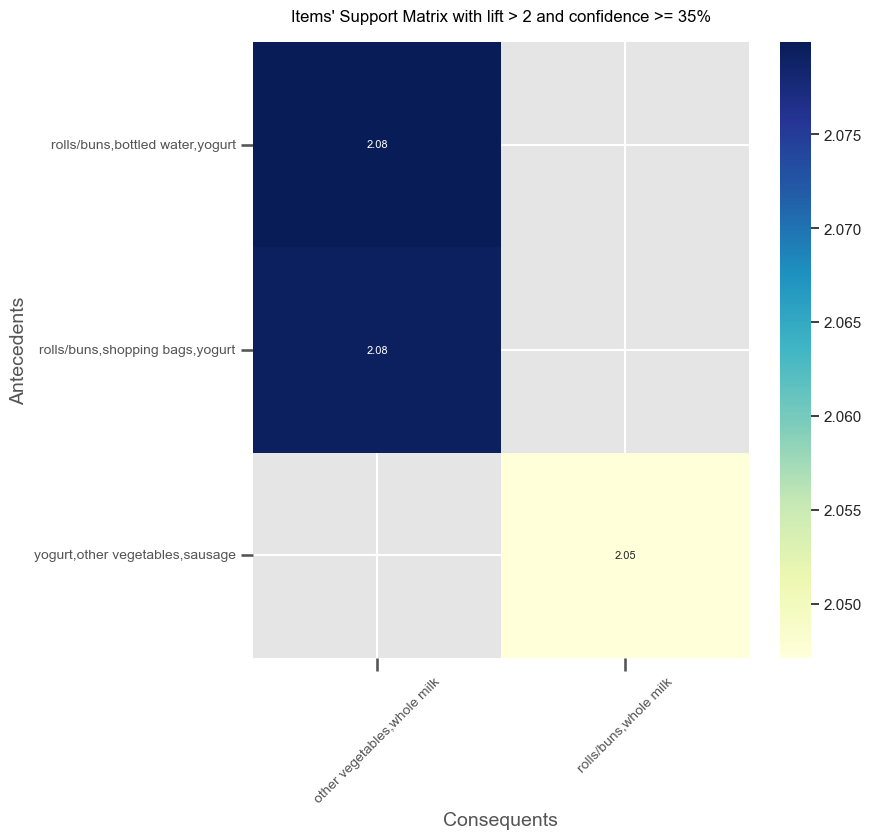

In [45]:
# Visualize
# plot a heatmap to know how strong the association is based on lift values
market_rules_sorted['lhs items'] = market_rules_sorted['antecedents'].apply(lambda x:len(x) )
market_rules_sorted[market_rules_sorted['lhs items'] >=2 ].sort_values('lift', ascending=False).head()

# Replace frozen sets with strings
market_rules_sorted['antecedents_'] = market_rules_sorted['antecedents'].apply(lambda a: ','.join(list(a)))
market_rules_sorted['consequents_'] = market_rules_sorted['consequents'].apply(lambda a: ','.join(list(a)))

# Transform the DataFrame of rules into a matrix using the lift metric
pivot = market_rules_sorted[market_rules_sorted['lhs items']>2].pivot(index = 'antecedents_', 
                            columns = 'consequents_', values= 'lift')

sns.set_context("talk")
plt.style.use('ggplot')
plt.subplots(figsize=(8, 8))
sns.set()

# Adjust the plot
ax = sns.heatmap(data=pivot, 
                 annot=True, 
                 fmt='.2f', 
                 cmap='YlGnBu', 
                 cbar=True, 
                 annot_kws={"fontsize": 8})
plt.title("Items' Support Matrix with lift > 2 and confidence >= 35%", 
          fontsize=12, 
          y=1.02)
ax.set_xlabel("Consequents",fontsize=14)
ax.set_ylabel("Antecedents",fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.show() 

In [46]:
# Replace frozen sets with strings
market_rules_sorted['antecedents_'] = market_rules_sorted['antecedents'].apply(lambda a: ','.join(list(a)))
market_rules_sorted['consequents_'] = market_rules_sorted['consequents'].apply(lambda a: ','.join(list(a)))

# Adjust the plot
fig = px.parallel_categories(market_rules_sorted, 
                             dimensions=['antecedents_', 'consequents_'], 
                             color='lift')

# Update the layout
fig.update_layout(
    title='Parallel Categories Diagram with lift > 2 and confidence >= 35%',
    title_x=0.5,
    font=dict(size=12)
)

# Show the plot
fig.show()

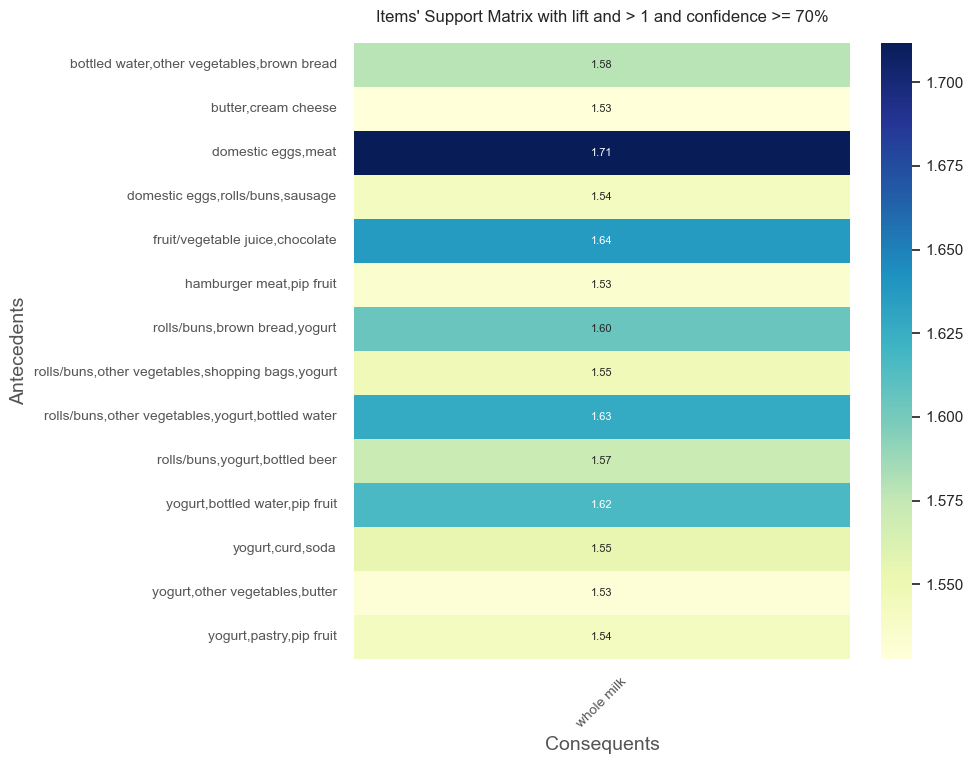

In [47]:
# plot a heatmap to know how strong the association is based on lift values
market_rules_sorted2['lhs items'] = market_rules_sorted2['antecedents'].apply(lambda x:len(x) )
market_rules_sorted2[market_rules_sorted2['lhs items'] >=1 ].sort_values('lift', ascending=False).head()

# Replace frozen sets with strings
market_rules_sorted2['antecedents_'] = market_rules_sorted2['antecedents'].apply(lambda a: ','.join(list(a)))
market_rules_sorted2['consequents_'] = market_rules_sorted2['consequents'].apply(lambda a: ','.join(list(a)))

# Transform the DataFrame of rules into a matrix using the lift metric
pivot = market_rules_sorted2[market_rules_sorted2['lhs items']>1].pivot(index = 'antecedents_', 
                        columns = 'consequents_', values= 'lift')

sns.set_context("talk")
plt.style.use('ggplot')
plt.subplots(figsize=(8, 8))
sns.set()
ax = sns.heatmap(data=pivot, 
                 annot=True, 
                 fmt='.2f', 
                 cmap='YlGnBu', 
                 cbar=True, 
                 annot_kws={"fontsize": 8})
plt.title("Items' Support Matrix with lift and > 1 and confidence >= 70%", 
          fontsize=12, 
          y=1.02)
ax.set_xlabel("Consequents",fontsize=14)
ax.set_ylabel("Antecedents",fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.show() 

In [48]:
# Replace frozen sets with strings
market_rules_sorted2['antecedents_'] = market_rules_sorted2['antecedents'].apply(lambda a: ','.join(list(a)))
market_rules_sorted2['consequents_'] = market_rules_sorted2['consequents'].apply(lambda a: ','.join(list(a)))

# Create a Parallel Categories Diagram
fig = px.parallel_categories(market_rules_sorted2, 
                             dimensions=['antecedents_', 'consequents_'], 
                             color='lift')

fig.update_layout(
    title='Parallel Categories Diagram with lift > 1 and confidence >= 70%',
    title_x=0.5,
    font=dict(size=12)
)

fig.show()

# FP Growth

In [49]:
# Import the libraries
from mlxtend.frequent_patterns import fpgrowth

In [50]:
# Start the timer
start_time_fp = time.time()

# Execution the fp growth 
frequent_item_fp = fpgrowth(basket_sets, min_support = 0.01, use_colnames = True)

# End the timer
end_time_fp = time.time()
execution_time = end_time_fp - start_time_fp
print(f"Fp Growth execution took: {execution_time} seconds")

Fp Growth execution took: 0.6479799747467041 seconds


In [51]:
frequent_item_fp.sort_values(by="support", ascending=False)

support                                           itemsets
0     0.458184                                       (whole milk)
17    0.376603                                 (other vegetables)
11    0.349666                                       (rolls/buns)
1     0.313494                                             (soda)
2     0.282966                                           (yogurt)
...        ...                                                ...
1216  0.010005                (tropical fruit, pastry, pip fruit)
2412  0.010005              (root vegetables, rolls/buns, onions)
2905  0.010005            (domestic eggs, other vegetables, pork)
677   0.010005       (whipped/sour cream, other vegetables, curd)
1559  0.010005  (root vegetables, bottled water, other vegetab...

[3016 rows x 2 columns]

In [52]:
rules_fp = association_rules(frequent_item_fp, metric = "lift", min_threshold = 1)
rules_fp.sort_values(by="lift", ascending=False)

antecedents  \
347    (other vegetables, whole milk, sausage)   
358                       (rolls/buns, yogurt)   
349     (rolls/buns, other vegetables, yogurt)   
356                      (whole milk, sausage)   
3543                     (whole milk, sausage)   
...                                        ...   
5485                                    (soda)   
14289                           (cream cheese)   
14288                              (pip fruit)   
12301                            (brown bread)   
12300                     (whipped/sour cream)   

                                   consequents  antecedent support  \
347                       (rolls/buns, yogurt)            0.050282   
358    (other vegetables, whole milk, sausage)            0.111339   
349                      (whole milk, sausage)            0.052335   
356     (rolls/buns, other vegetables, yogurt)            0.106978   
3543                            (yogurt, curd)            0.106978   
...                                        ...                 ...   
5485     (other vegetables, frozen vegetables)            0.313494   
14289                              (pip fruit)            0.088507   
14288                           (cream cheese)            0.170600   
12301                     (whipped/sour cream)            0.135967   
12300                            (brown bread)            0.154695   

       consequent support   support  confidence      lift  leverage  \
347              0.111339  0.013597    0.270408  2.428689  0.007998   
358              0.050282  0.013597    0.122120  2.428689  0.007998   
349              0.106978  0.013597    0.259804  2.428575  0.007998   
356              0.052335  0.013597    0.127098  2.428575  0.007998   
3543             0.040277  0.010005    0.093525  2.322046  0.005696   
...                   ...       ...         ...       ...       ...   
5485             0.045664  0.014366    0.045827  1.003549  0.000051   
14289            0.170600  0.015136    0.171014  1.002428  0.000037   
14288            0.088507  0.015136    0.088722  1.002428  0.000037   
12301            0.154695  0.021036    0.154717  1.000144  0.000003   
12300            0.135967  0.021036    0.135987  1.000144  0.000003   

       conviction  zhangs_metric  
347      1.218025       0.619400  
358      1.081831       0.661957  
349      1.206467       0.620721  
356      1.085650       0.658702  
3543     1.058742       0.637549  
...           ...            ...  
5485     1.000170       0.005152  
14289    1.000500       0.002657  
14288    1.000236       0.002920  
12301    1.000026       0.000167  
12300    1.000023       0.000170  

[15260 rows x 10 columns]

In [53]:
rules_sorted_fp = rules_fp[(rules_fp['lift'] >= 2)]
rules_sorted_fp.sort_values(by="lift", ascending=False)

antecedents  \
347         (other vegetables, whole milk, sausage)   
358                            (rolls/buns, yogurt)   
349          (rolls/buns, other vegetables, yogurt)   
356                           (whole milk, sausage)   
3543                          (whole milk, sausage)   
...                                             ...   
7215  (rolls/buns, other vegetables, shopping bags)   
6131                       (rolls/buns, whole milk)   
6134               (other vegetables, frozen meals)   
7232                     (yogurt, other vegetables)   
7217        (rolls/buns, shopping bags, whole milk)   

                                  consequents  antecedent support  \
347                      (rolls/buns, yogurt)            0.050282   
358   (other vegetables, whole milk, sausage)            0.111339   
349                     (whole milk, sausage)            0.052335   
356    (rolls/buns, other vegetables, yogurt)            0.106978   
3543                           (yogurt, curd)            0.106978   
...                                       ...                 ...   
7215                     (yogurt, whole milk)            0.032837   
6131         (other vegetables, frozen meals)            0.178553   
6134                 (rolls/buns, whole milk)            0.027707   
7232  (rolls/buns, shopping bags, whole milk)            0.120318   
7217               (yogurt, other vegetables)            0.041303   

      consequent support   support  confidence      lift  leverage  \
347             0.111339  0.013597    0.270408  2.428689  0.007998   
358             0.050282  0.013597    0.122120  2.428689  0.007998   
349             0.106978  0.013597    0.259804  2.428575  0.007998   
356             0.052335  0.013597    0.127098  2.428575  0.007998   
3543            0.040277  0.010005    0.093525  2.322046  0.005696   
...                  ...       ...         ...       ...       ...   
7215            0.150590  0.010005    0.304688  2.023291  0.005060   
6131            0.027707  0.010005    0.056034  2.022430  0.005058   
6134            0.178553  0.010005    0.361111  2.022430  0.005058   
7232            0.041303  0.010005    0.083156  2.013296  0.005036   
7217            0.120318  0.010005    0.242236  2.013296  0.005036   

      conviction  zhangs_metric  
347     1.218025       0.619400  
358     1.081831       0.661957  
349     1.206467       0.620721  
356     1.085650       0.658702  
3543    1.058742       0.637549  
...          ...            ...  
7215    1.221623       0.522927  
6131    1.030010       0.615433  
6134    1.285743       0.519951  
7232    1.045648       0.572141  
7217    1.160892       0.524986  

[74 rows x 10 columns]

In [54]:
rules_sorted_fp = rules_fp[(rules_fp['lift'] > 2) & (rules_fp['confidence'] >= 0.3) ].sort_values(by='lift', ascending=False).reset_index(drop=True) 
rules_sorted_fp

antecedents  \
0        (rolls/buns, other vegetables, sausage)   
1                     (whole milk, frozen meals)   
2            (rolls/buns, bottled water, yogurt)   
3            (rolls/buns, shopping bags, yogurt)   
4                                (curd, sausage)   
5                  (yogurt, whole milk, sausage)   
6            (yogurt, shopping bags, whole milk)   
7            (yogurt, other vegetables, sausage)   
8  (rolls/buns, other vegetables, shopping bags)   
9               (other vegetables, frozen meals)   

                      consequents  antecedent support  consequent support  \
0            (yogurt, whole milk)            0.041816            0.150590   
1  (rolls/buns, other vegetables)            0.032581            0.146742   
2  (other vegetables, whole milk)            0.026424            0.191380   
3  (other vegetables, whole milk)            0.025141            0.191380   
4            (yogurt, whole milk)            0.032068            0.150590   
5  (rolls/buns, other vegetables)            0.044895            0.146742   
6  (rolls/buns, other vegetables)            0.033094            0.146742   
7        (rolls/buns, whole milk)            0.037199            0.178553   
8            (yogurt, whole milk)            0.032837            0.150590   
9        (rolls/buns, whole milk)            0.027707            0.178553   

    support  confidence      lift  leverage  conviction  zhangs_metric  
0  0.013597    0.325153  2.159196  0.007300    1.258671       0.560294  
1  0.010005    0.307087  2.092699  0.005224    1.231407       0.539733  
2  0.010518    0.398058  2.079934  0.005461    1.343352       0.533308  
3  0.010005    0.397959  2.079417  0.005194    1.343131       0.532483  
4  0.010005    0.312000  2.071850  0.005176    1.234607       0.534479  
5  0.013597    0.302857  2.063876  0.007009    1.223936       0.539705  
6  0.010005    0.302326  2.060254  0.005149    1.223003       0.532237  
7  0.013597    0.365517  2.047107  0.006955    1.294672       0.531268  
8  0.010005    0.304688  2.023291  0.005060    1.221623       0.522927  
9  0.010005    0.361111  2.022430  0.005058    1.285743       0.519951

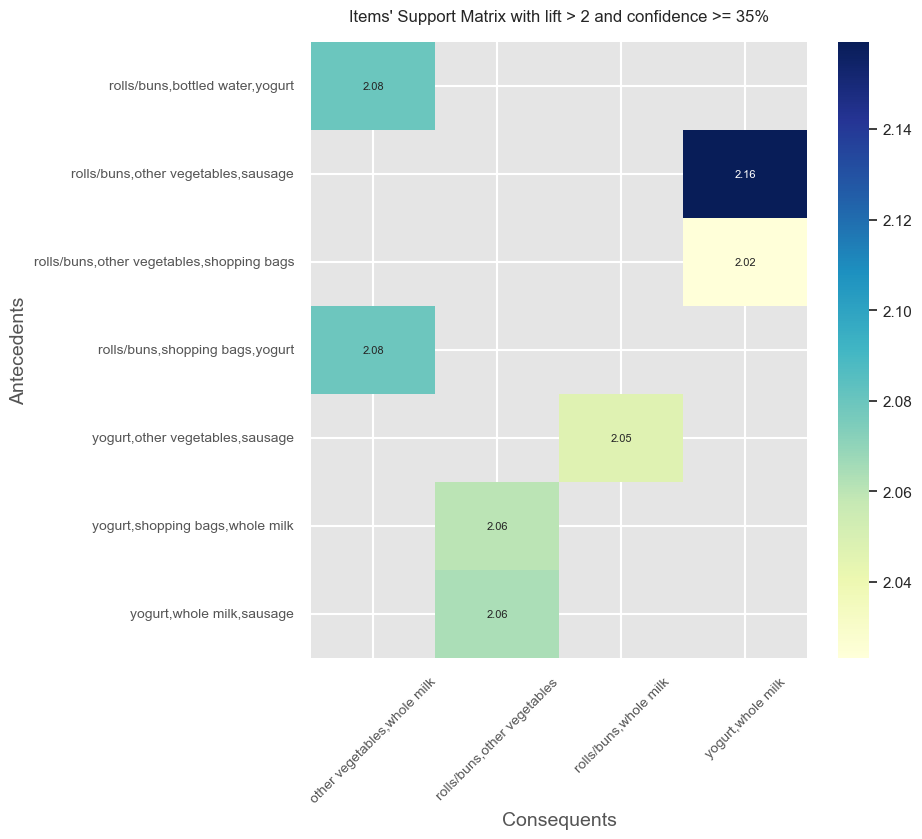

In [55]:
# Visualize
# plot a heatmap to know how strong the association is based on lift values
rules_sorted_fp['lhs items'] = rules_sorted_fp['antecedents'].apply(lambda x:len(x) )
rules_sorted_fp[rules_sorted_fp['lhs items'] >=2 ].sort_values('lift', ascending=False).head()

# Replace frozen sets with strings
rules_sorted_fp['antecedents_'] = rules_sorted_fp['antecedents'].apply(lambda a: ','.join(list(a)))
rules_sorted_fp['consequents_'] = rules_sorted_fp['consequents'].apply(lambda a: ','.join(list(a)))

# Transform the DataFrame of rules into a matrix using the lift metric
pivot = rules_sorted_fp[rules_sorted_fp['lhs items']>2].pivot(index = 'antecedents_', 
                            columns = 'consequents_', values= 'lift')

sns.set_context("talk")
plt.style.use('ggplot')
plt.subplots(figsize=(8, 8))
sns.set()

# Adjust the plot
ax = sns.heatmap(data=pivot, 
                 annot=True, 
                 fmt='.2f', 
                 cmap='YlGnBu', 
                 cbar=True, 
                 annot_kws={"fontsize": 8})
plt.title("Items' Support Matrix with lift > 2 and confidence >= 35%", 
          fontsize=12, 
          y=1.02)
ax.set_xlabel("Consequents",fontsize=14)
ax.set_ylabel("Antecedents",fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.show() 

In [56]:
# Replace frozen sets with strings
rules_sorted_fp['antecedents_'] = rules_sorted_fp['antecedents'].apply(lambda a: ','.join(list(a)))
rules_sorted_fp['consequents_'] = rules_sorted_fp['consequents'].apply(lambda a: ','.join(list(a)))

# Adjust the plot
fig = px.parallel_categories(rules_sorted_fp, 
                             dimensions=['antecedents_', 'consequents_'], 
                             color='lift')

# Update the layout
fig.update_layout(
    title='Parallel Categories Diagram with lift > 2 and confidence >= 35%',
    title_x=0.5,
    font=dict(size=12)
)

# Show the plot
fig.show()

In [57]:
rules_sorted_fp2 = rules_fp[(rules_fp['lift'] > 1) & (rules_fp['confidence'] >= 0.7) ].sort_values(by='lift', ascending=False).reset_index(drop=True) 
rules_sorted_fp2

antecedents   consequents  \
0                               (domestic eggs, meat)  (whole milk)   
1                  (fruit/vegetable juice, chocolate)  (whole milk)   
2   (rolls/buns, other vegetables, yogurt, bottled...  (whole milk)   
3                  (yogurt, bottled water, pip fruit)  (whole milk)   
4                   (rolls/buns, brown bread, yogurt)  (whole milk)   
5      (bottled water, other vegetables, brown bread)  (whole milk)   
6                  (rolls/buns, yogurt, bottled beer)  (whole milk)   
7                                (yogurt, curd, soda)  (whole milk)   
8   (rolls/buns, other vegetables, shopping bags, ...  (whole milk)   
9                         (yogurt, pastry, pip fruit)  (whole milk)   
10               (domestic eggs, rolls/buns, sausage)  (whole milk)   
11                        (hamburger meat, pip fruit)  (whole milk)   
12                 (yogurt, other vegetables, butter)  (whole milk)   
13                             (butter, cream cheese)  (whole milk)   

    antecedent support  consequent support   support  confidence      lift  \
0             0.013084            0.458184  0.010262    0.784314  1.711789   
1             0.014366            0.458184  0.010775    0.750000  1.636898   
2             0.014110            0.458184  0.010518    0.745455  1.626978   
3             0.013853            0.458184  0.010262    0.740741  1.616689   
4             0.017445            0.458184  0.012827    0.735294  1.604802   
5             0.016675            0.458184  0.012057    0.723077  1.578138   
6             0.019241            0.458184  0.013853    0.720000  1.571422   
7             0.015136            0.458184  0.010775    0.711864  1.553666   
8             0.014110            0.458184  0.010005    0.709091  1.547613   
9             0.014879            0.458184  0.010518    0.706897  1.542823   
10            0.014879            0.458184  0.010518    0.706897  1.542823   
11            0.016419            0.458184  0.011544    0.703125  1.534592   
12            0.022319            0.458184  0.015649    0.701149  1.530280   
13            0.015393            0.458184  0.010775    0.700000  1.527772   

    leverage  conviction  zhangs_metric  
0   0.004267    2.512057       0.421328  
1   0.004192    2.167265       0.394760  
2   0.004053    2.128564       0.390879  
3   0.003914    2.089863       0.386811  
4   0.004834    2.046862       0.383561  
5   0.004417    1.956559       0.372554  
6   0.005038    1.935058       0.370768  
7   0.003840    1.880421       0.361838  
8   0.003540    1.862494       0.358908  
9   0.003701    1.848550       0.357152  
10  0.003701    1.848550       0.357152  
11  0.004022    1.825065       0.354176  
12  0.005423    1.813001       0.354436  
13  0.003722    1.806054       0.350852

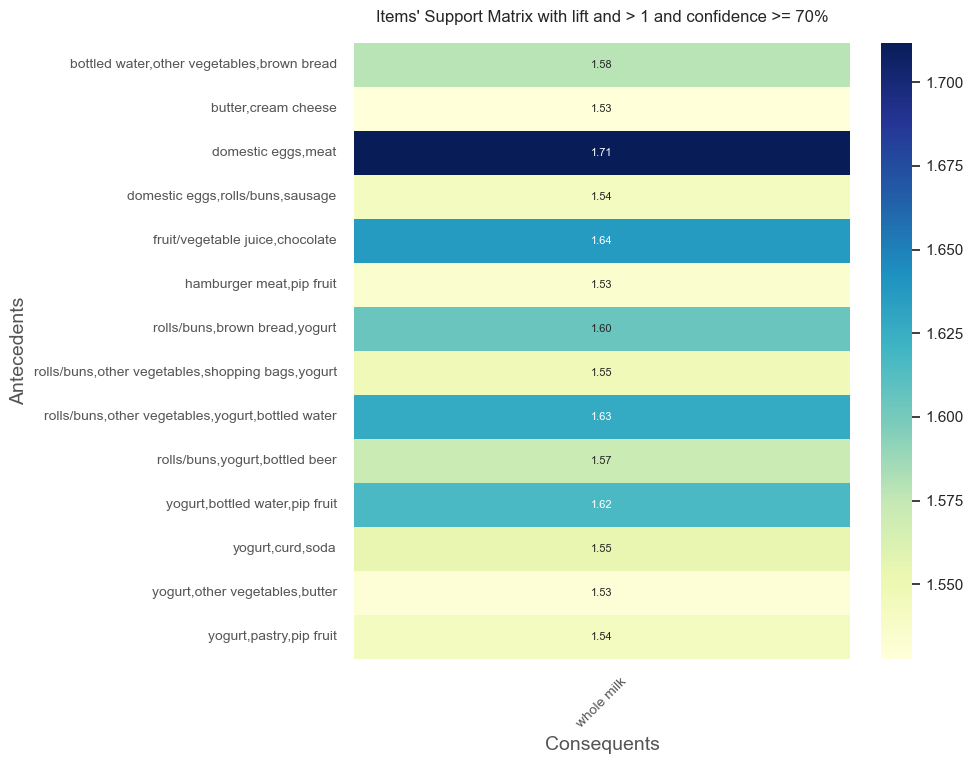

In [58]:
# plot a heatmap to know how strong the association is based on lift values
rules_sorted_fp2['lhs items'] = rules_sorted_fp2['antecedents'].apply(lambda x:len(x) )
rules_sorted_fp2[rules_sorted_fp2['lhs items'] >=1 ].sort_values('lift', ascending=False).head()

# Replace frozen sets with strings
rules_sorted_fp2['antecedents_'] = rules_sorted_fp2['antecedents'].apply(lambda a: ','.join(list(a)))
rules_sorted_fp2['consequents_'] = rules_sorted_fp2['consequents'].apply(lambda a: ','.join(list(a)))

# Transform the DataFrame of rules into a matrix using the lift metric
pivot = rules_sorted_fp2[rules_sorted_fp2['lhs items']>1].pivot(index = 'antecedents_', 
                        columns = 'consequents_', values= 'lift')

sns.set_context("talk")
plt.style.use('ggplot')
plt.subplots(figsize=(8, 8))
sns.set()
ax = sns.heatmap(data=pivot, 
                 annot=True, 
                 fmt='.2f', 
                 cmap='YlGnBu', 
                 cbar=True, 
                 annot_kws={"fontsize": 8})
plt.title("Items' Support Matrix with lift and > 1 and confidence >= 70%", 
          fontsize=12, 
          y=1.02)
ax.set_xlabel("Consequents",fontsize=14)
ax.set_ylabel("Antecedents",fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.show() 

In [59]:
# Replace frozen sets with strings
rules_sorted_fp2['antecedents_'] = rules_sorted_fp2['antecedents'].apply(lambda a: ','.join(list(a)))
rules_sorted_fp2['consequents_'] = rules_sorted_fp2['consequents'].apply(lambda a: ','.join(list(a)))

# Adjust the plot
fig = px.parallel_categories(rules_sorted_fp2, 
                             dimensions=['antecedents_', 'consequents_'], 
                             color='lift')

# Update the layout
fig.update_layout(
    title='Parallel Categories Diagram with lift > 1 and confidence >= 70%',
    title_x=0.5,
    font=dict(size=12)
)

# Show the plot
fig.show()

In [60]:
# Calculating run time for apriori

warnings.filterwarnings('ignore')

l = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.10]
t_ap = []

for i in l:
    t1 = time.time()
    apriori(basket_sets, 
            min_support = i, 
            use_colnames = True)
    
    t2 = time.time()
    t_ap.append((t2 - t1) * 1000)

In [61]:
# Calculating run time for fp growth

warnings.filterwarnings('ignore')

l = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.10]
t_fp = []

for i in l:
    t1 = time.time()
    fpgrowth(basket_sets, 
             min_support = i, 
             use_colnames = True)
    
    t2 = time.time()
    t_fp.append((t2 - t1) * 1000)

In [62]:
# Comparing time run of apriori and fp growth

# Set to DataFrame
time = pd.DataFrame({'Support Threshold': l, 
                     'Apriori': t_ap, 
                     'FP Growth': t_fp})
# Make the plot and adjust
fig = px.line(time, 
              x='Support Threshold', 
              y=['Apriori', 'FP Growth'], 
              labels={'value': 'Run Time in ms'}, 
              title='Apriori vs FP Growth Run Time')

# Adjust the layout
fig.update_layout(xaxis_title='Min Support Threshold', 
                  yaxis_title='Run Time in ms', 
                  legend_title='Algorithm')

# Show the plot
fig.show()